In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings

warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

In [2]:
# Загрузка БД
data = pd.read_csv(filepath_or_buffer = 'C:/Users/lokri/PycharmProjects/Pract/full_DB.csv', sep= ',')
angle_types = {'full_face': ['a_0', 'b_0'], 'left': ['a_30(1)', 'b_30(1)'], 'right': ['a_30(2)', 'b_30(2)']}
data


,person,angle_type,target_,x60_61_mean,x60_61_std,y60_61_mean,y60_61_std,x60_62_mean,x60_62_std,y60_62_mean,...,y65_67_mean,y65_67_std,x66_67_mean,x66_67_std,y66_67_mean,y66_67_std,perimeter_mean,perimeter_std,square_mean,square_std
0,Barbara,a_0,zero,0.292178,0.037299,0.326422,0.057830,0.445784,0.038008,0.337337,...,0.015394,0.019078,0.157998,0.007382,0.025071,0.018413,2.090053,0.121651,0.150230,0.107372
1,Barbara,a_0,one,0.337754,0.014030,0.328152,0.066886,0.501917,0.017889,0.343866,...,0.014768,0.011225,0.167723,0.009051,0.007314,0.011609,2.301945,0.074883,0.209894,0.155775
2,Barbara,a_0,two,0.331088,0.021806,0.302152,0.066137,0.492463,0.020772,0.309502,...,0.011590,0.010158,0.164485,0.009184,0.014904,0.013241,2.226415,0.053674,0.136291,0.119742
3,Barbara,a_0,three,0.339754,0.019990,0.315967,0.083073,0.506988,0.017516,0.326561,...,0.015350,0.013348,0.168387,0.007442,0.009640,0.012833,2.270277,0.046629,0.176672,0.147766
4,Barbara,a_0,four,0.331161,0.026048,0.321348,0.073868,0.492951,0.027849,0.328678,...,0.007450,0.011480,0.165562,0.008264,0.023419,0.014385,2.187616,0.095476,0.195066,0.131532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,Masha,b_30(2),six,0.616990,0.053113,0.130199,0.085984,0.823518,0.053438,0.123783,...,0.065980,0.022414,0.208603,0.017294,0.059680,0.013638,2.537840,0.116694,0.297019,0.162925
1316,Masha,b_30(2),seven,0.658556,0.026205,0.059504,0.043176,0.854227,0.032266,0.087989,...,0.083527,0.018333,0.195056,0.011827,0.064133,0.010787,2.572341,0.088951,0.252094,0.135429
1317,Masha,b_30(2),eight,0.564554,0.051464,0.078239,0.056812,0.769217,0.050858,0.063938,...,0.069728,0.020119,0.204672,0.008185,0.054901,0.010380,2.368498,0.128286,0.184878,0.067044
1318,Masha,b_30(2),nine,0.629920,0.025462,0.061890,0.036226,0.830853,0.029298,0.057044,...,0.068153,0.013123,0.197531,0.006919,0.061570,0.011965,2.555072,0.085842,0.246165,0.130856


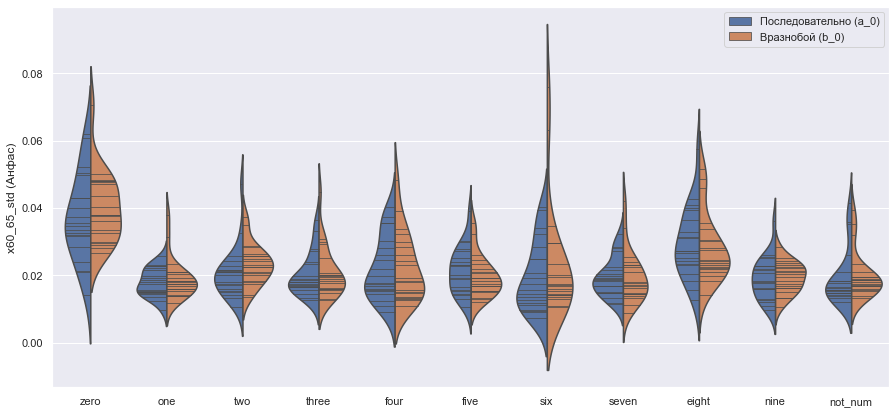

In [3]:
# Построение графиков-скрипок для выборок с разной последовательностью прочтения цифр

plt.figure(figsize = [15,7])
y = 'x60_65_std'
ax = sns.violinplot(x = 'target_', y= y, data = data.loc[(data['angle_type'].isin(angle_types['full_face']))], hue = 'angle_type', split = True, inner = 'stick')
plt.xlabel('')
plt.ylabel(y + ' (Анфас)')
ax.legend(handles=ax.legend_.legendHandles, labels=['Последовательно (a_0)', 'Вразнобой (b_0)'])
plt.show()

In [4]:
# Проверка выборок с разной последовательностью прочтения при помощи критерия Манна-Уитни
lst = []
for i in data.columns[3:]:
    print(i + ':', stats.mannwhitneyu(data.loc[data['angle_type'].isin(['a_0', 'a_30(1)', 'a_30(2)'])][i], data.loc[data['angle_type'].isin(['b_0', 'b_30(1)' , 'b_30(2)'])][i]))


x60_61_mean: MannwhitneyuResult(statistic=215901.0, pvalue=0.7839607984251966)
x60_61_std: MannwhitneyuResult(statistic=217283.0, pvalue=0.9405429809633463)
y60_61_mean: MannwhitneyuResult(statistic=215368.0, pvalue=0.7254898421208608)
y60_61_std: MannwhitneyuResult(statistic=216987.0, pvalue=0.9065965022427164)
x60_62_mean: MannwhitneyuResult(statistic=215271.0, pvalue=0.7150076406674406)
x60_62_std: MannwhitneyuResult(statistic=212549.0, pvalue=0.44831855271713184)
y60_62_mean: MannwhitneyuResult(statistic=213131.0, pvalue=0.500200063684493)
y60_62_std: MannwhitneyuResult(statistic=216569.0, pvalue=0.8589619694367283)
x60_63_mean: MannwhitneyuResult(statistic=216298.0, pvalue=0.8283403468838489)
x60_63_std: MannwhitneyuResult(statistic=209537.0, pvalue=0.2327980400959223)
y60_63_mean: MannwhitneyuResult(statistic=215208.0, pvalue=0.7082281468647729)
y60_63_std: MannwhitneyuResult(statistic=214851.0, pvalue=0.6702601932102619)
x60_64_mean: MannwhitneyuResult(statistic=213582.0, pvalue

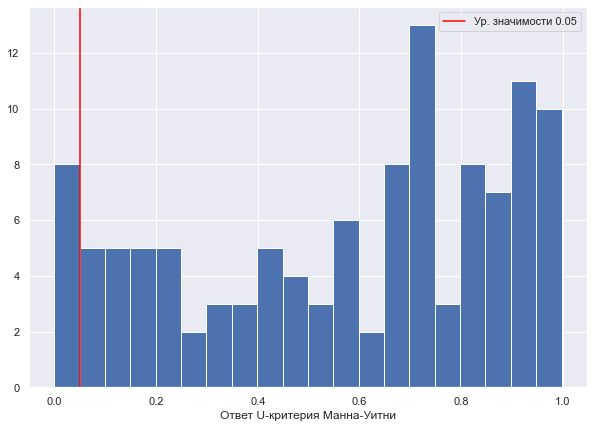

In [5]:
lst = []
for i in data.columns[3:]:
    lst.append(stats.mannwhitneyu(data.loc[data['angle_type'].isin(['a_0', 'a_30(1)', 'a_30(2)'])][i],\
                        data.loc[data['angle_type'].isin(['b_0', 'b_30(1)' , 'b_30(2)'])][i]).pvalue)
plt.figure(figsize = (10, 7))
plt.hist(lst, bins = 20)
plt.axvline(x= 0.05, label = 'Ур. значимости 0.05', c= "red")
plt.xlabel('Ответ U-критерия Манна-Уитни', size = 12)
plt.legend()

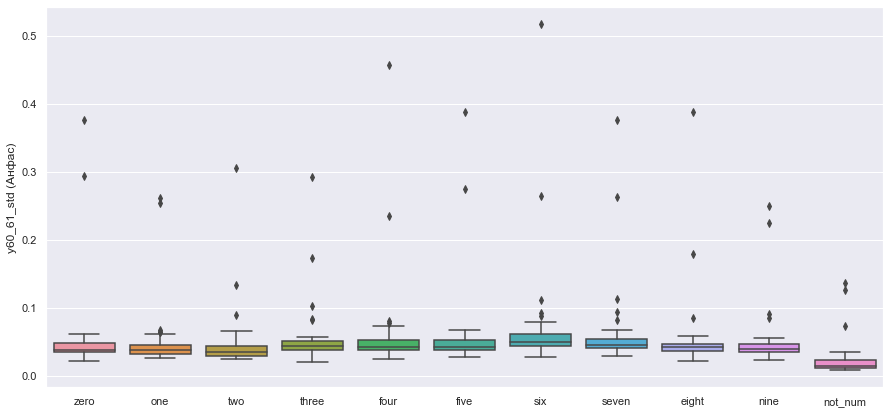

In [6]:
# Построение диаграмм размаха до очистки от выбросов

plt.figure(figsize = [15,7])
y = 'y60_61_std'
sns.boxplot(x = 'target_', y= y, data = data.loc[data['angle_type'].isin(angle_types['full_face'])])
plt.xlabel('')
plt.ylabel(y + ' (Анфас)')
plt.show()

In [7]:
# Очистка данных от выбросов

clean_data = pd.DataFrame()
for key, val in angle_types.items():
    for k in data['target_'].unique():
        sample = data.loc[(data['target_'] == k) & (data['angle_type'].isin(val))]
        Q1 = sample.quantile(0.25)
        Q3 = sample.quantile(0.75)
        IQR = Q3 - Q1
        clean_sample = sample[~((sample < (Q1 - 1.8 * IQR)) | (sample > (Q3 + 1.8 * IQR))).any(axis = 1)]
        clean_data = pd.concat([clean_data, clean_sample])

clean_data

,person,angle_type,target_,x60_61_mean,x60_61_std,y60_61_mean,y60_61_std,x60_62_mean,x60_62_std,y60_62_mean,...,y65_67_mean,y65_67_std,x66_67_mean,x66_67_std,y66_67_mean,y66_67_std,perimeter_mean,perimeter_std,square_mean,square_std
429,Ilya3,b_0,zero,0.309762,0.036990,0.108556,0.034119,0.490257,0.040230,0.094688,...,0.013020,0.010350,0.184582,0.006150,0.036249,0.004969,2.091555,0.122496,0.089260,0.040733
462,Ilya4,a_0,zero,0.336742,0.031096,0.135447,0.038327,0.536312,0.035318,0.119172,...,0.004904,0.005877,0.197496,0.009405,0.031675,0.007934,2.107193,0.129453,0.095030,0.042740
561,Ilyas,b_0,zero,0.309721,0.025203,0.122567,0.037785,0.496502,0.024958,0.115382,...,0.011965,0.007166,0.188167,0.010135,0.018307,0.004486,2.077658,0.095917,0.071233,0.033673
594,Ilyas10,a_0,zero,0.294926,0.021005,0.133830,0.025997,0.484371,0.018272,0.122141,...,0.011688,0.008661,0.189452,0.009067,0.027904,0.008071,2.053569,0.045129,0.089132,0.041327
660,Ilyas2,a_0,zero,0.304116,0.025456,0.175377,0.051145,0.491031,0.028835,0.170545,...,0.009595,0.006744,0.188727,0.007481,0.018333,0.006107,2.125569,0.096768,0.095610,0.048010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,Ilyas7,b_30(2),not_num,0.474750,0.014287,0.109477,0.015843,0.665818,0.017538,0.088170,...,0.012497,0.009270,0.191899,0.007106,0.023922,0.007664,2.161765,0.051033,0.012380,0.008130
1088,Ilyas8,a_30(2),not_num,0.512251,0.014834,0.094740,0.013185,0.719134,0.015993,0.070574,...,0.007618,0.007149,0.205732,0.006995,0.025525,0.006700,2.299450,0.053238,0.022273,0.010247
1121,Ilyas8,b_30(2),not_num,0.510040,0.011241,0.089991,0.011664,0.701997,0.011552,0.063016,...,0.020620,0.007809,0.193977,0.005762,0.026557,0.007128,2.289841,0.035804,0.019246,0.007977
1154,Ilyas9,a_30(2),not_num,0.481438,0.011711,0.110021,0.013105,0.674051,0.013739,0.083467,...,0.022177,0.008245,0.192505,0.006652,0.030345,0.006865,2.196195,0.044535,0.015081,0.008875


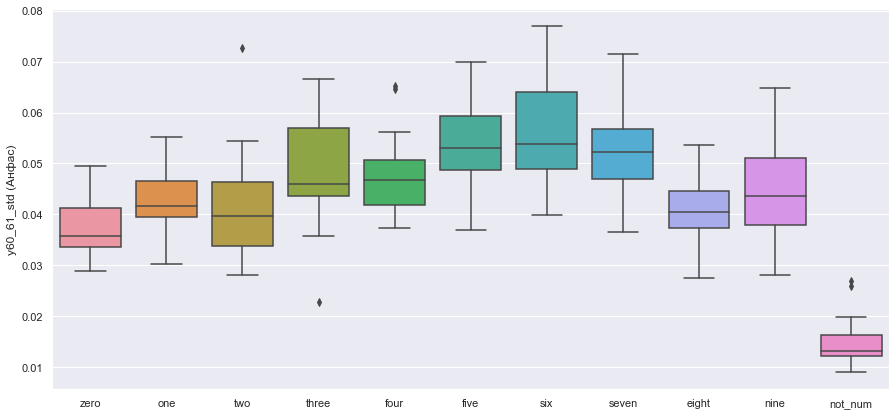

In [8]:
# Построение диаграмм размаха до очистки от выбросов

plt.figure(figsize = [15,7])
y = 'y60_61_std'
sns.boxplot(x = 'target_', y= y, data = clean_data.loc[clean_data['angle_type'].isin(angle_types['right'])])
plt.xlabel('')
plt.ylabel(y + ' (Анфас)')
plt.show()


In [9]:
# Поиск основных описательных статистик 

clean_general_stats = pd.DataFrame(list(zip(clean_data.columns[3:],
                      clean_data.iloc[:, 3:].min(),
                      clean_data.iloc[:, 3:].quantile(0.25),
                      clean_data.iloc[:, 3:].median(),
                      clean_data.iloc[:, 3:].quantile(0.75),
                      clean_data.iloc[:, 3:].max(),
                      clean_data.iloc[:, 3:].mean(),
                      clean_data.iloc[:, 3:].std())))
clean_general_stats.columns = ['Признак', 'Мин.', '1ый Квартиль', 'Медиана', '3ий Квартиль', 'Макс.', 'Ср. Арифм.', 'СКО']


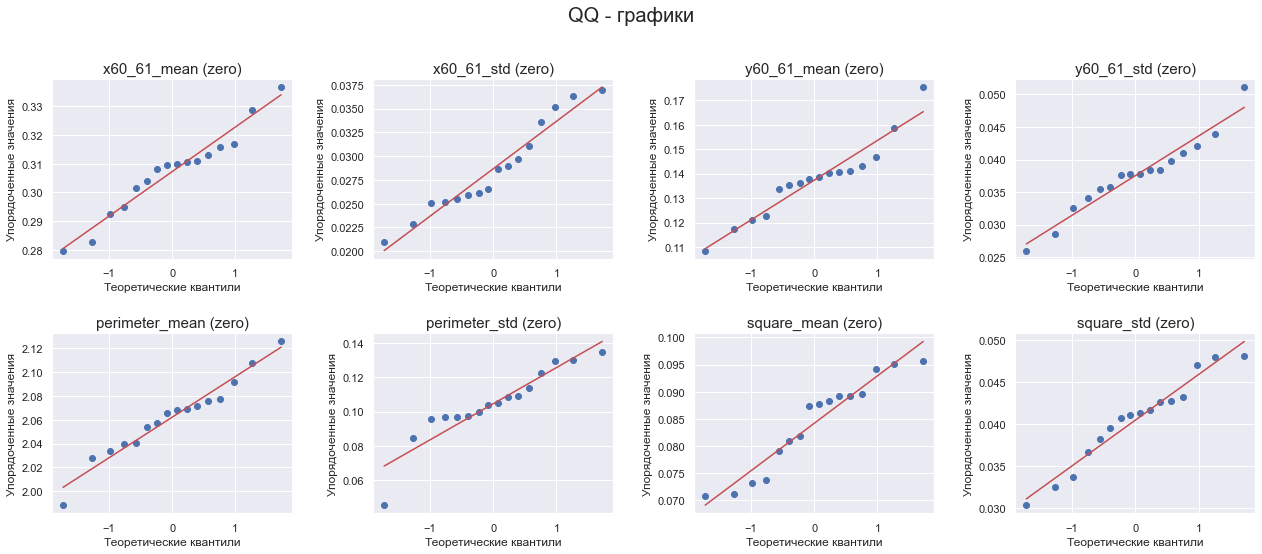

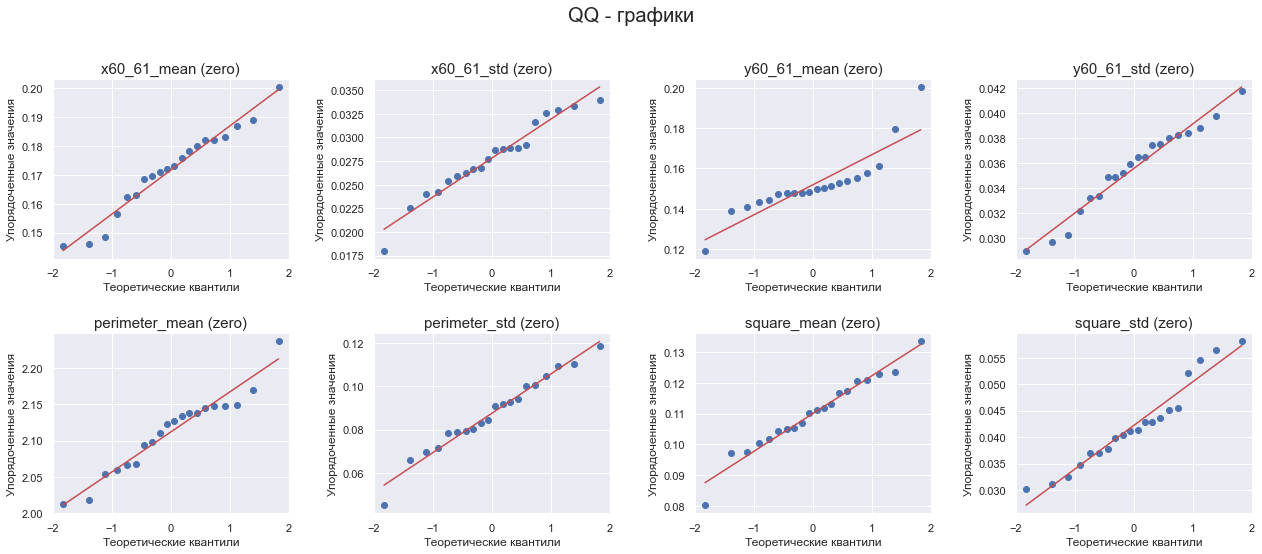

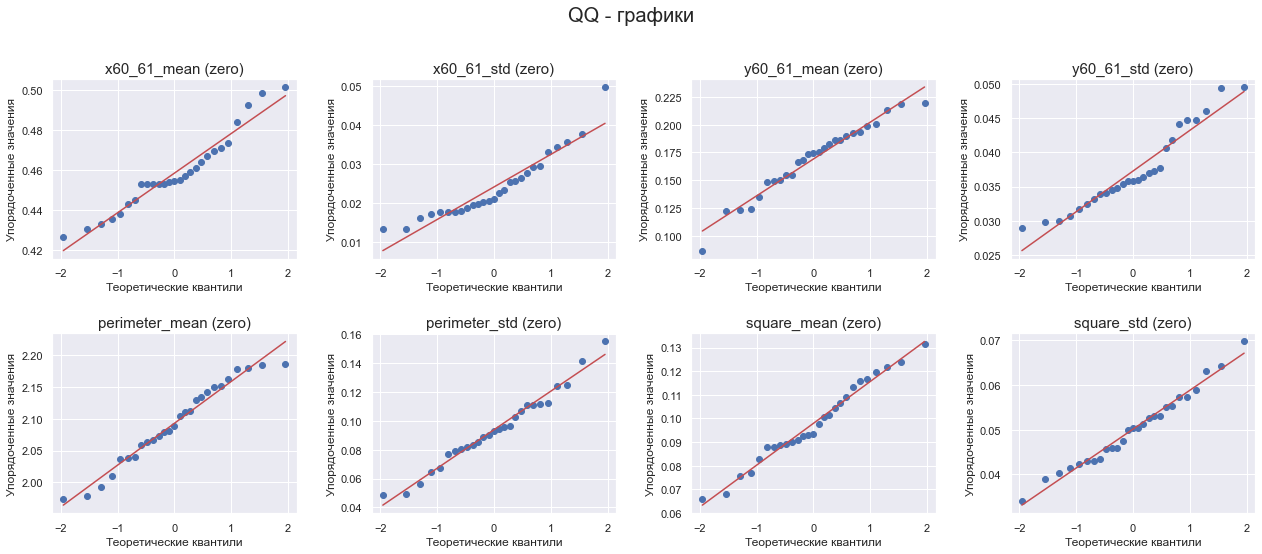

In [10]:
# Построение Квантиль-Квантиль графиков 

names_for_qqs = list(clean_data.columns[3:7]) + (list(clean_data.columns[-4:]))

for key, val in angle_types.items():
    for k in data['target_'].unique()[0:1]:
        fig, ax = plt.subplots(2, 4, figsize = [18,8])

        for i in range(len(ax)):
            for j in range(len(ax[i])):
                stats.probplot(clean_data.loc[(clean_data['target_'] == k) & (clean_data['angle_type'].isin(val))][names_for_qqs[i*4 + j]], plot=ax[i, j])
                ax[i, j].set_title(names_for_qqs[i*4 + j] +' (' + k + ')', fontsize = 15)
                ax[i, j].set_xlabel('Теоретические квантили')
                ax[i, j].set_ylabel('Упорядоченные значения')
                fig.suptitle('QQ - графики', fontsize=20)


        fig.tight_layout(pad = 2)
        plt.show()

In [11]:
# Проверка выборок на нормальность распределений

test_df = pd.DataFrame()
for key, val in angle_types.items():
    for k in data['target_'].unique():
        data_set = clean_data.loc[(clean_data['target_'] == k) & (clean_data['angle_type'].isin(val))].iloc[:,3:]
        tests = pd.DataFrame([data_set.apply(lambda x: stats.shapiro(x).pvalue),
                              data_set.apply(lambda x: stats.normaltest(x).pvalue)])
        tests.index = ['Shapiro', 'Chi-2']
        
        tests = (tests > 0.05).sum()/2
        test_df = pd.concat([test_df, tests], axis = 1, ignore_index= True)

(test_df.T.sum()/33 <0.7).sum()

21

In [12]:
# Сравнение значений независимых переменных при разных зависимых переменных критерием Краскела-Уоллиса

lst = []
for i in clean_data.columns[3:]:
    lst.append(stats.mstats.kruskal(*[group[i].values for name, group in clean_data.groupby("target_")]).pvalue < 0.05)
np.sum(lst)/len(lst)

0.8879310344827587

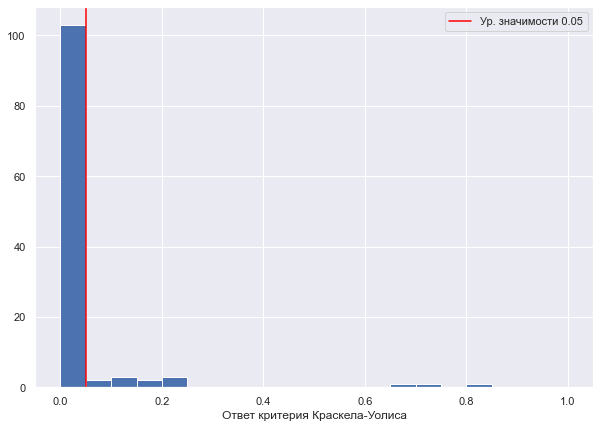

In [13]:
lst = []
for i in clean_data.columns[3:]:
    lst.append(stats.mstats.kruskal(*[group[i].values for name, \
                                      group in clean_data.groupby("target_")]).pvalue)
plt.figure(figsize = (10, 7))
plt.hist(lst, bins = 20, range = (0, 1))
plt.axvline(x= 0.05, label = 'Ур. значимости 0.05', c= "red")
plt.xlabel('Ответ критерия Краскела-Уолиса')
plt.legend()

In [14]:
# Сравнение значений независимых переменных при разных зависимых переменных при помощи ANOVA

lst = []
for i in clean_data.columns[3:]:
    lst.append(stats.mstats.f_oneway(*[group[i].values for name,\
    group in clean_data.loc[clean_data['angle_type'].\
    isin(angle_types['full_face'])].groupby("target_")]).pvalue < 0.05)
np.sum(lst)/len(lst)

0.8879310344827587

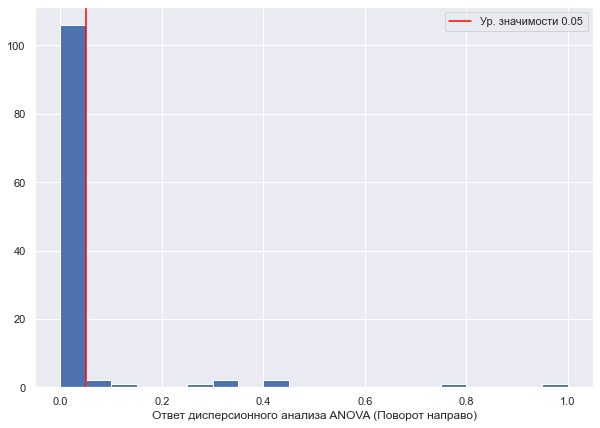

In [15]:
lst = []
for i in clean_data.columns[3:]:
    lst.append(stats.mstats.f_oneway(*[group[i].values for name,\
    group in clean_data.loc[clean_data['angle_type'].\
    isin(angle_types['right'])].groupby("target_")]).pvalue)
plt.figure(figsize = (10, 7))
plt.hist(lst, bins = 20, range = (0, 1))
plt.axvline(x= 0.05, label = 'Ур. значимости 0.05', c= "red")
plt.xlabel('Ответ дисперсионного анализа ANOVA (Поворот направо)')
plt.legend()

In [18]:
# Очистка признакового пространства от коррелированных признаков

cor_matrix = clean_data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.65)]
print(len(to_drop))

final_data = clean_data.drop(to_drop, axis=1).reset_index()
final_data.to_csv(path_or_buf='C:/Users/lokri/PycharmProjects/Pract/final_data.csv', index = False)
final_data

91


,index,person,angle_type,target_,x60_61_mean,x60_61_std,y60_61_mean,y60_61_std,x60_64_mean,y60_64_mean,...,x61_67_mean,x61_67_std,y62_63_std,x62_66_std,x62_67_std,x63_65_std,y65_66_std,y65_67_mean,y66_67_mean,y66_67_std
0,429,Ilya3,b_0,zero,0.309762,0.036990,0.108556,0.034119,1.020812,0.025309,...,0.012971,0.007085,0.009155,0.004526,0.006912,0.005102,0.007356,0.013020,0.036249,0.004969
1,462,Ilya4,a_0,zero,0.336742,0.031096,0.135447,0.038327,1.028729,0.024351,...,0.002754,0.004518,0.005954,0.004772,0.011533,0.004938,0.004830,0.004904,0.031675,0.007934
2,561,Ilyas,b_0,zero,0.309721,0.025203,0.122567,0.037785,1.018699,0.047009,...,0.006948,0.005428,0.006112,0.002504,0.010516,0.003375,0.006625,0.011965,0.018307,0.004486
3,594,Ilyas10,a_0,zero,0.294926,0.021005,0.133830,0.025997,1.004846,0.018918,...,0.002785,0.004780,0.006946,0.004768,0.009996,0.003646,0.006707,0.011688,0.027904,0.008071
4,660,Ilyas2,a_0,zero,0.304116,0.025456,0.175377,0.051145,1.033142,0.046258,...,0.009621,0.007192,0.009125,0.006360,0.012058,0.007517,0.007322,0.009595,0.018333,0.006107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1055,Ilyas7,b_30(2),not_num,0.474750,0.014287,0.109477,0.015843,1.058592,0.010332,...,0.012940,0.006178,0.007838,0.006381,0.009679,0.006013,0.008185,0.012497,0.023922,0.007664
766,1088,Ilyas8,a_30(2),not_num,0.512251,0.014834,0.094740,0.013185,1.132770,0.009266,...,0.015861,0.005506,0.006716,0.005918,0.007353,0.005412,0.006535,0.007618,0.025525,0.006700
767,1121,Ilyas8,b_30(2),not_num,0.510040,0.011241,0.089991,0.011664,1.122314,0.036559,...,0.016825,0.005670,0.006995,0.005448,0.006105,0.005718,0.007402,0.020620,0.026557,0.007128
768,1154,Ilyas9,a_30(2),not_num,0.481438,0.011711,0.110021,0.013105,1.074675,0.018708,...,0.015362,0.005951,0.007700,0.006656,0.008169,0.005986,0.007895,0.022177,0.030345,0.006865
